# Outlier Analysis

### Importing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

high_value_df = pd.read_csv('../data/processed/high_value_outliers.csv')
high_frequency_df = pd.read_csv('../data/processed/high_freq_outliers.csv')

In [4]:
high_frequency_df.set_index('Customer ID', inplace=True)
high_value_df.set_index('Customer ID', inplace=True)

### Segmenting 

In [5]:
overlap_df = high_frequency_df.index.intersection(high_value_df.index)

high_value_only = high_value_df.drop(overlap_df)
high_frequency_only = high_frequency_df.drop(overlap_df)
high_value_and_frequency = high_value_df.loc[overlap_df]

In [6]:
high_value_only['Segment'] = 0
high_frequency_only['Segment'] = 1
high_value_and_frequency['Segment'] = 2

outliers_segment_df = pd.concat([high_value_only, high_frequency_only, high_value_and_frequency])

In [7]:
outliers_segment_df.groupby('Segment').count()

,TotalSpent,OrderCount,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,PurchaseFrequency
Segment,,,,,,,
0,422,422,422,422,422,422,422
1,10,10,10,10,10,10,10
2,1,1,1,1,1,1,1


### Visualizing Segment Spread by RFM features

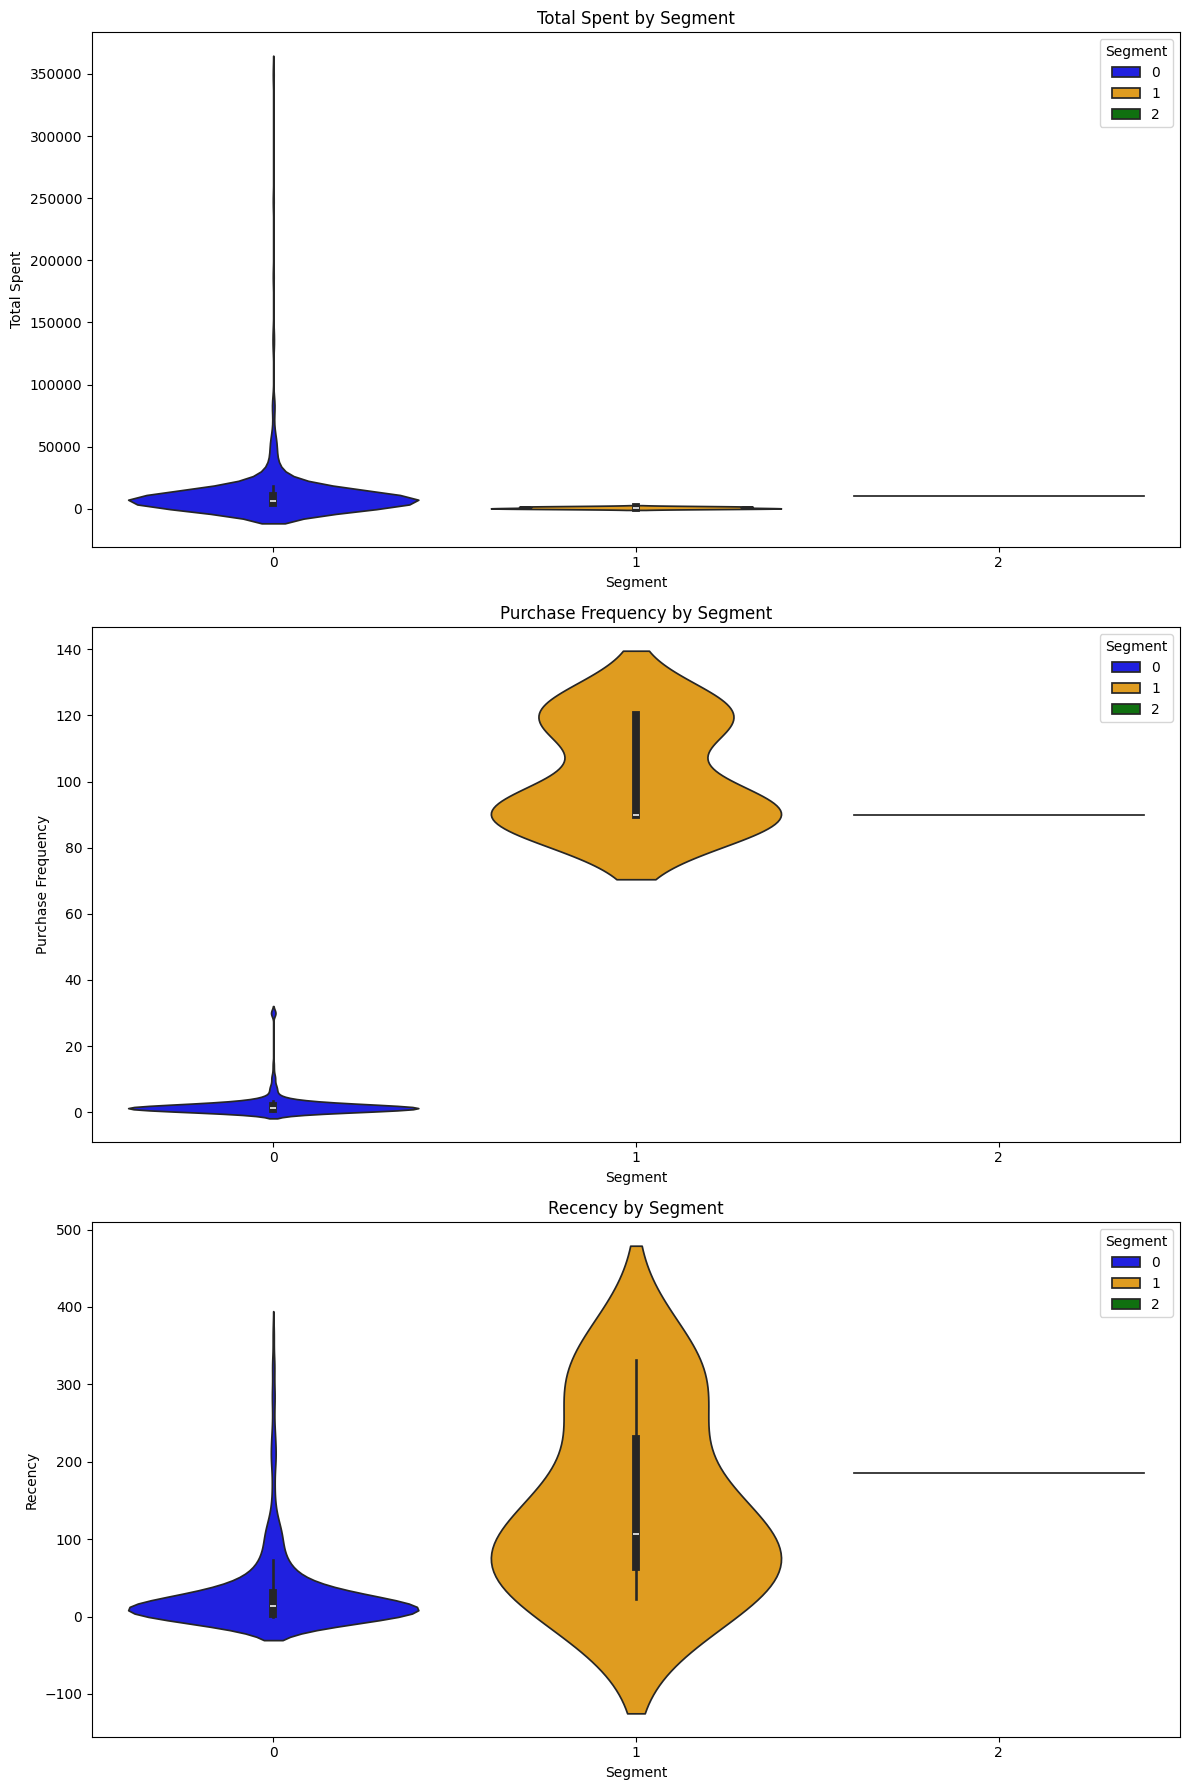

In [8]:
cluster_colors = {
  0: 'blue',
  1: 'orange',
  2: 'green'
}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x='Segment', y='TotalSpent', data=outliers_segment_df, palette=cluster_colors, hue='Segment')
plt.title('Total Spent by Segment')
plt.ylabel('Total Spent')

plt.subplot(3, 1, 2)
sns.violinplot(x='Segment', y='PurchaseFrequency', data=outliers_segment_df, palette=cluster_colors, hue='Segment')
plt.title('Purchase Frequency by Segment')
plt.ylabel('Purchase Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x='Segment', y='Recency', data=outliers_segment_df, palette=cluster_colors, hue='Segment')
plt.title('Recency by Segment')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Adding Segment Lables

In [9]:
cluster_labels = {
  0: 'Pamper',
  1: 'Upsell',
  2: 'Delight'
}

outliers_segment_df['Segment'] = outliers_segment_df['Segment'].map(cluster_labels)
outliers_segment_df.head()

,TotalSpent,OrderCount,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,PurchaseFrequency,Segment
Customer ID,,,,,,,,
12357.0,11229.99,1,2010-11-16 10:05:00,2010-11-16 10:05:00,1,23,30.00,Pamper
12380.0,4782.84,4,2010-02-15 12:05:00,2010-08-31 14:54:00,197,100,0.61,Pamper
12409.0,12346.62,4,2010-05-23 15:21:00,2010-10-15 10:24:00,144,55,0.83,Pamper
12415.0,19468.84,4,2010-06-30 08:30:00,2010-11-29 15:07:00,152,10,0.79,Pamper
12431.0,4145.52,11,2010-01-15 09:04:00,2010-12-01 10:03:00,320,8,1.03,Pamper


### Exporting Data

In [10]:
outliers_segment_df.to_csv('../data/processed/customer_metrics_outliers.csv')